In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing1/housing.csv


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.impute import SimpleImputer #لتعويض القيم المفقودة
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [114]:
    df=pd.read_csv('C:\Users\Carnival\Desktop\miroo programs\housing.csv')
    df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [115]:
df.info() #we don't have null value #  column No 9 is object so,we have to encoding category data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [116]:
df.shape

(20640, 10)

In [117]:
df.isna().sum()#total_bedrooms has na value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### titles=list(df.columns)

titles

In [118]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [119]:
df.duplicated().sum()

0

In [120]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [121]:
df.corr(numeric_only = True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [122]:
df.head(10).style.background_gradient(cmap="Blues")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY
5,-122.250000,37.850000,52.000000,919.000000,213.000000,413.000000,193.000000,4.036800,269700.000000,NEAR BAY
6,-122.250000,37.840000,52.000000,2535.000000,489.000000,1094.000000,514.000000,3.659100,299200.000000,NEAR BAY
7,-122.250000,37.840000,52.000000,3104.000000,687.000000,1157.000000,647.000000,3.120000,241400.000000,NEAR BAY
8,-122.260000,37.840000,42.000000,2555.000000,665.000000,1206.000000,595.000000,2.080400,226700.000000,NEAR BAY
9,-122.250000,37.840000,52.000000,3549.000000,707.000000,1551.000000,714.000000,3.691200,261100.000000,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

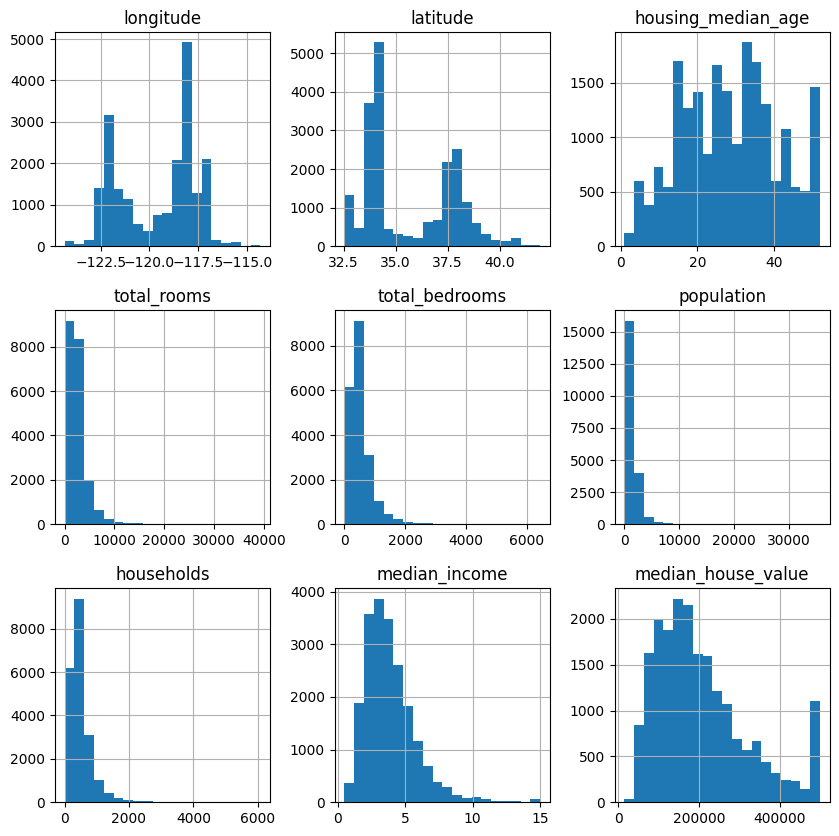

In [123]:
df.hist(bins=20,figsize=(10,10))

In [124]:
ocean_proximity_price = df.groupby('ocean_proximity')['median_house_value'].mean().reset_index()
ocean_proximity_price

,ocean_proximity,median_house_value
0,<1H OCEAN,240084.285464
1,INLAND,124805.392001
2,ISLAND,380440.000000
3,NEAR BAY,259212.311790
4,NEAR OCEAN,249433.977427


<Figure size 400x400 with 0 Axes>

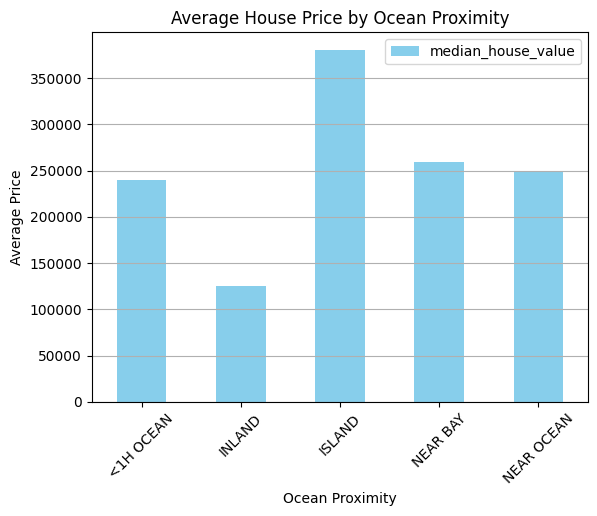

In [125]:
plt.figure(figsize=(4,4))
ocean_proximity_price.plot(kind='bar', color='skyblue')
plt.title('Average House Price by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Price')
plt.xticks([0,1, 2, 3, 4], ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],rotation=45)
plt.grid(axis='y')
plt.show()

In [126]:
df["median_income"].max()

15.0001

In [127]:
df["median_income"].min()

0.4999

In [128]:
df["median_income"].mode()

0     3.1250
1    15.0001
Name: median_income, dtype: float64

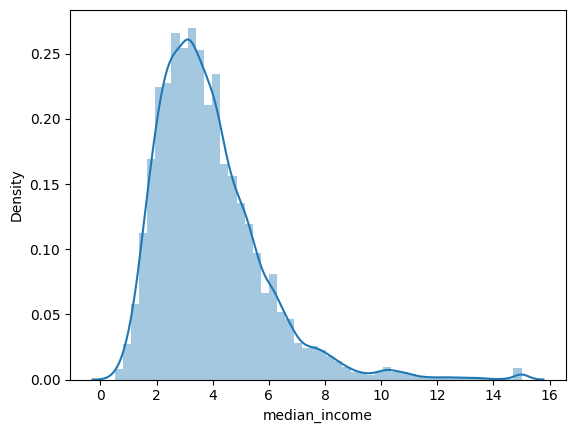

In [129]:
sns.distplot(df["median_income"])
plt.show()

<Axes: >

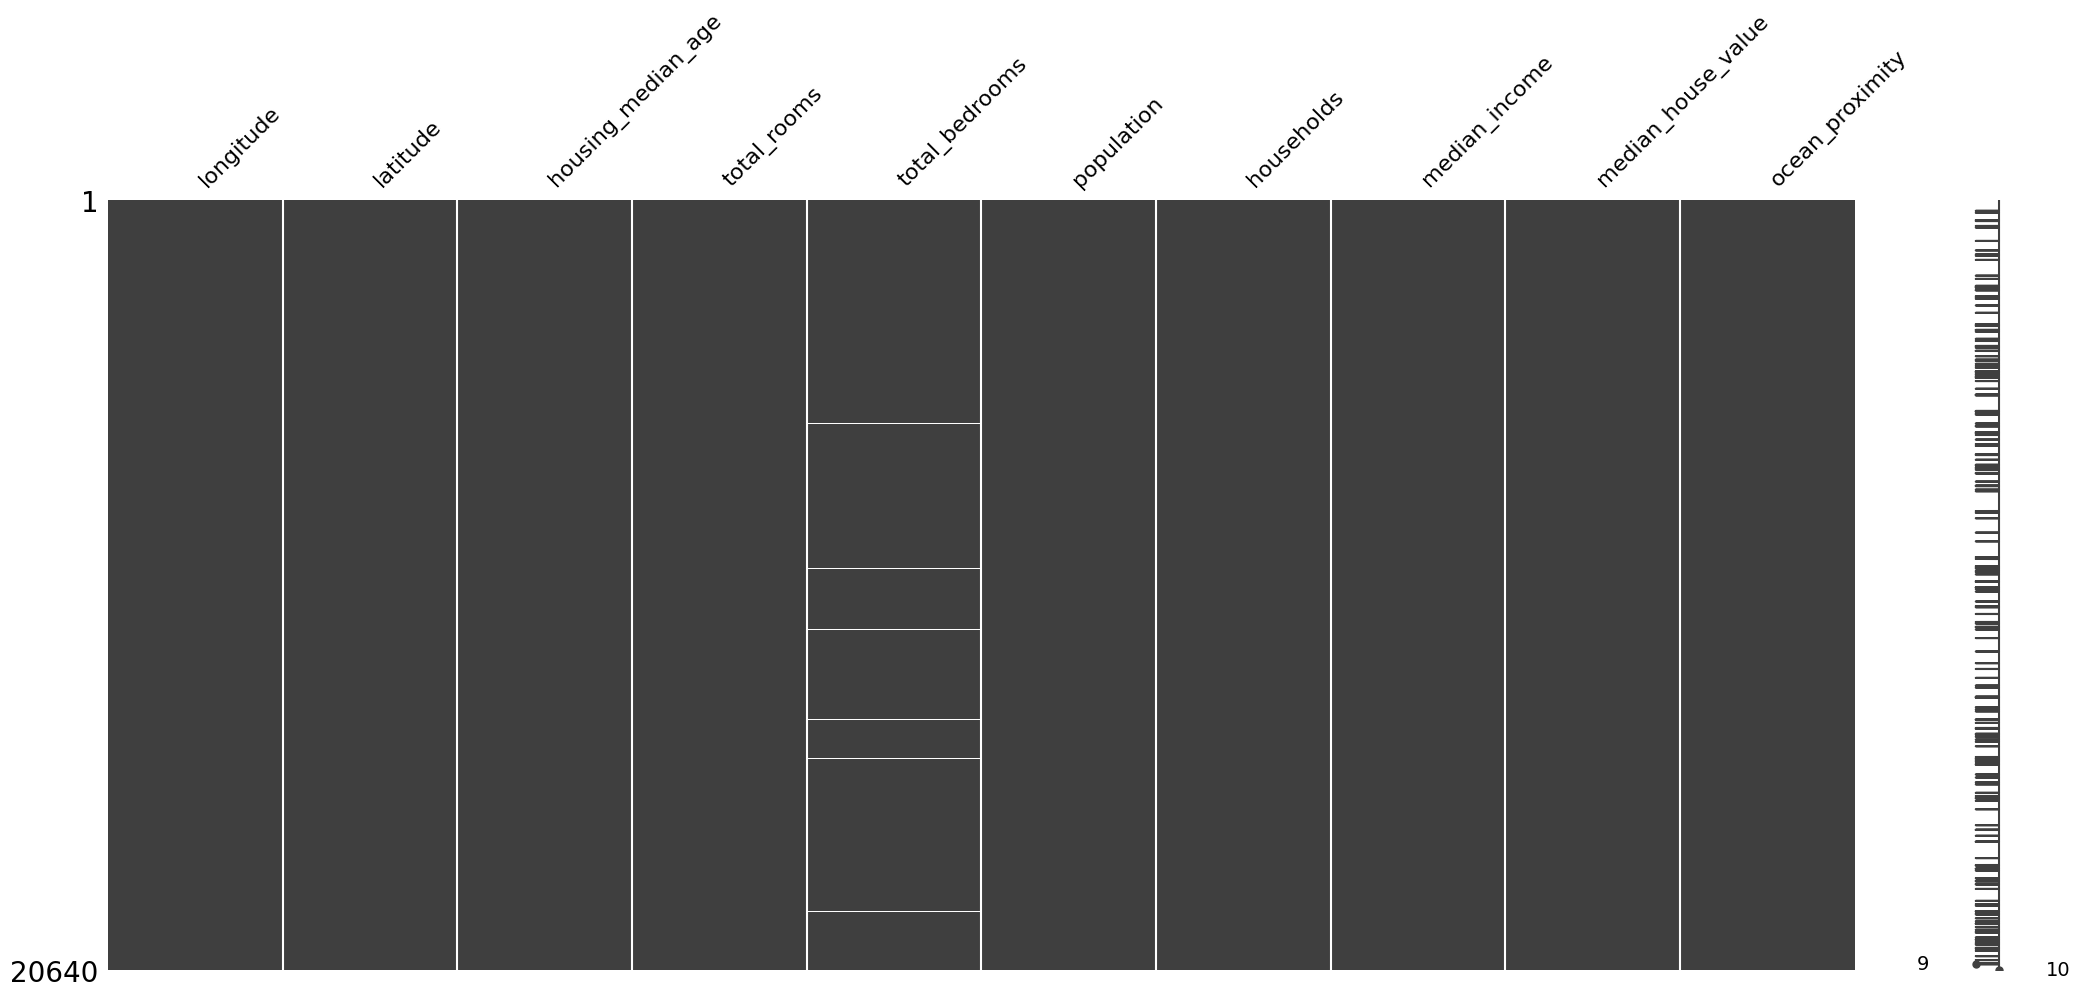

In [130]:
msno.matrix(df)

In [131]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [132]:
ocean_values=df['ocean_proximity'].unique()
ocean_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [133]:
raplicates = df['ocean_proximity'].value_counts()
raplicates

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

categories of (ocean_proximity) --- 
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
********************************************************************************


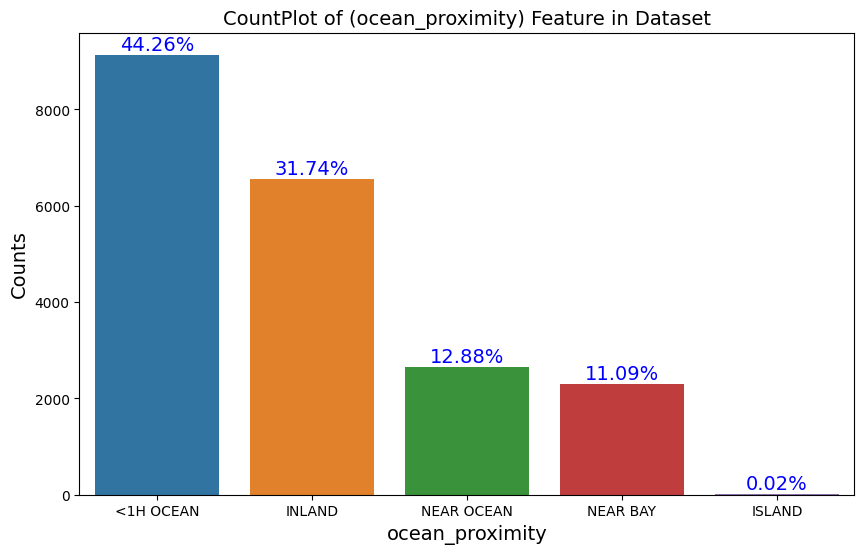

In [134]:
## Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)
print('**'*40)

## plotting

plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df, order=ocean_values.index)  ## ordered
plt.title('CountPlot of (ocean_proximity) Feature in Dataset', fontsize=14, c='k')
plt.xlabel('ocean_proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])


    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

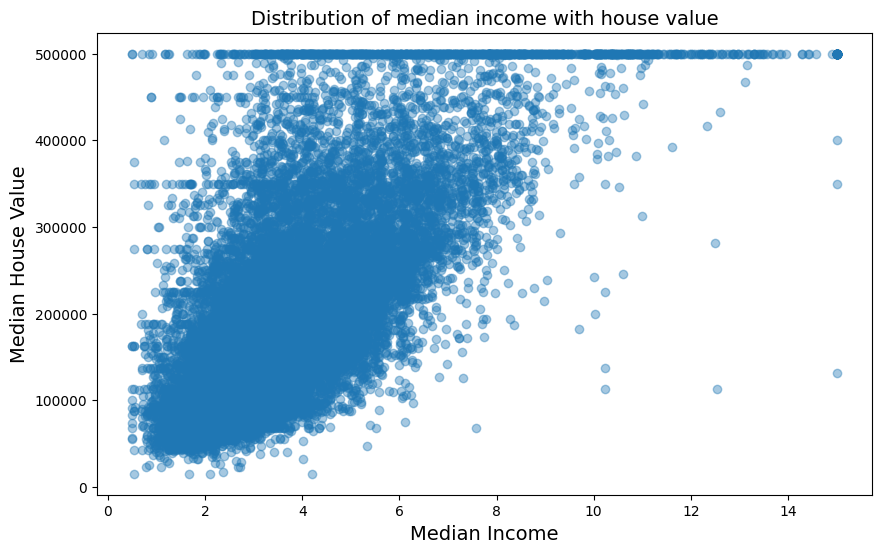

In [135]:
## scatte plot with important features (median_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.4)

plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

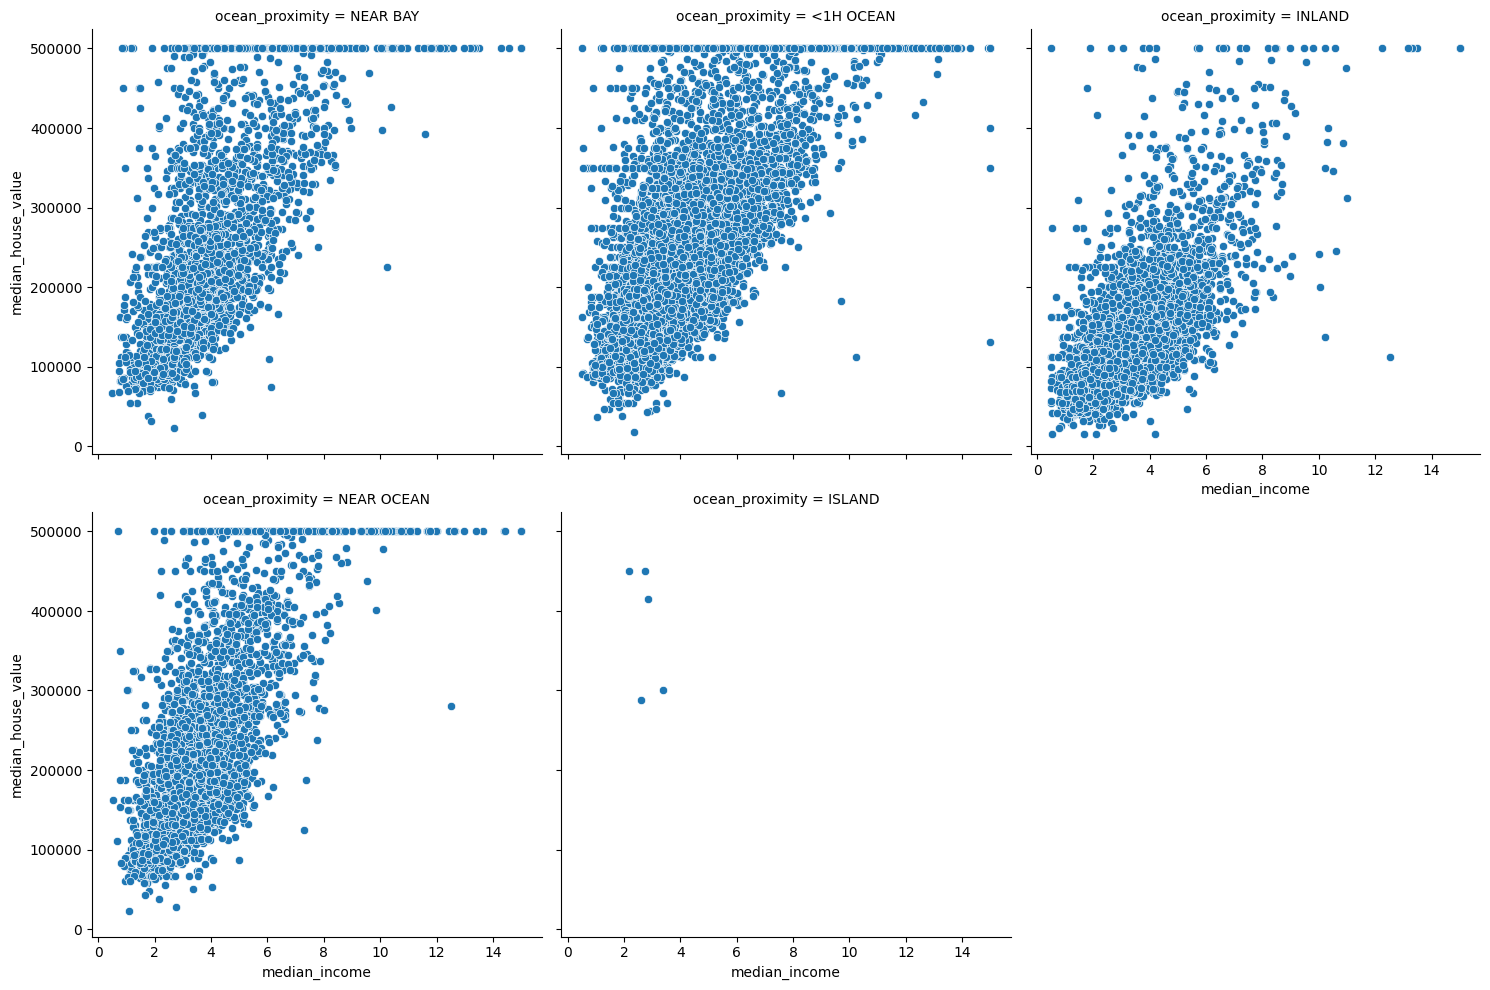

In [136]:
## Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df, kind='scatter',
            col='ocean_proximity', col_wrap=3)
plt.show()

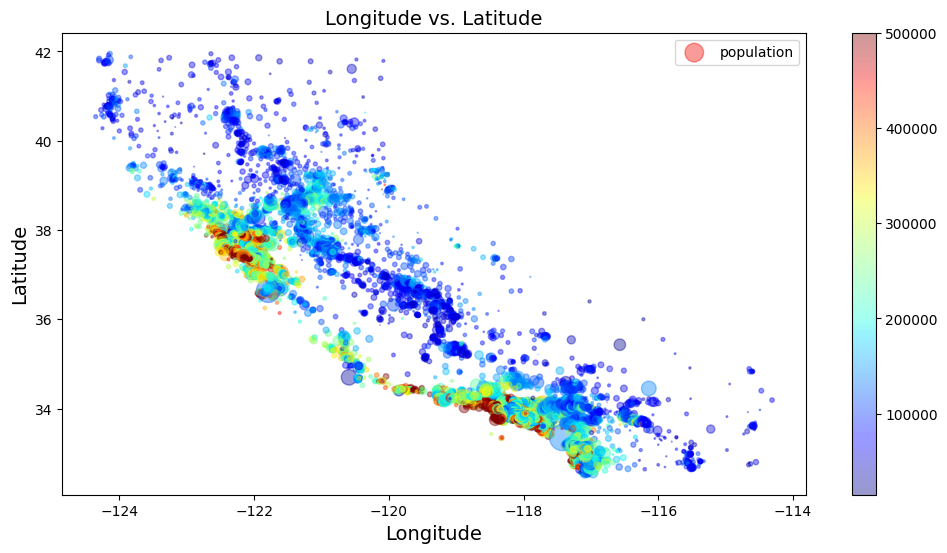

In [137]:
plt.figure(figsize=(12, 6))
sc=plt.scatter(df['longitude'], df['latitude'],s=df['population']/100,
                   alpha=0.4, c =df['median_house_value'], cmap=plt.get_cmap('jet'), label='population')
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()

In [138]:

df.corr(numeric_only = True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

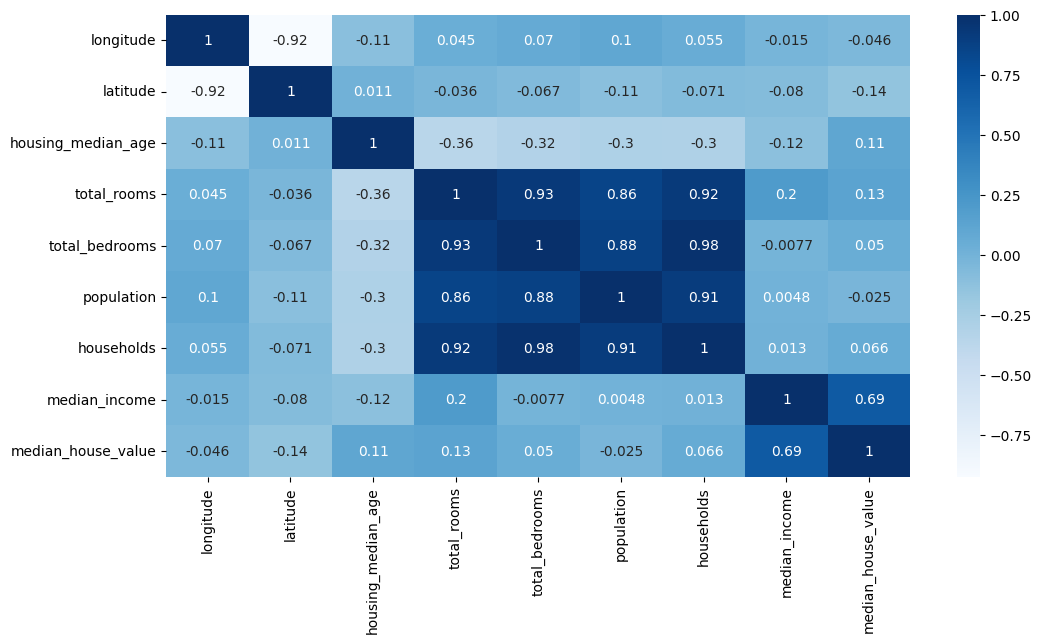

In [139]:

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='Blues')  ## symmetric matrix
plt.show()

In [140]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [141]:
#means=df["total_bedrooms"].mean()
df_filled=df.dropna()
df_filled.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [142]:
df_filled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Outliers

<Axes: >

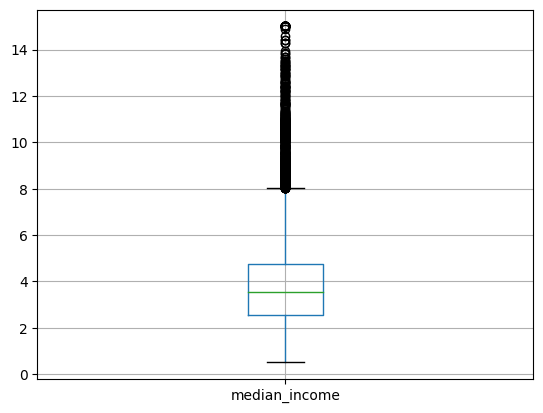

In [143]:
df_filled.boxplot('median_income')


<Axes: >

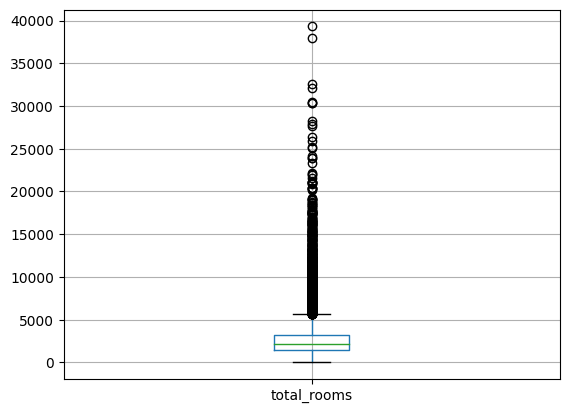

In [144]:
df_filled.boxplot('total_rooms')

In [145]:
for i in ['total_rooms']:
    q75,q25 = np.percentile(df_filled.loc[:,i],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f'For {i} Min Outliers has {df_filled.loc[df_filled[i] < min,i].shape[0]} rows and Max has {df_filled.loc[df_filled[i] > max,i].shape[0] } rows')
    
df_filled.loc[df_filled[i] < min,i] = np.nan
df_filled.loc[df_filled[i] > max,i] = np.nan

df_filled = df_filled.dropna(axis = 0)

df_filled.reset_index(inplace=True)
df_filled.drop(['index'],axis = 1,inplace=True)
print(f'For {i} Min Outliers has {df_filled.loc[df_filled[i] < min,i].shape[0]} rows and Max has {df_filled.loc[df_filled[i] > max,i].shape[0] } rows')

For total_rooms Min Outliers has 0 rows and Max has 1895 rows
For total_rooms Min Outliers has 0 rows and Max has 0 rows


<Axes: >

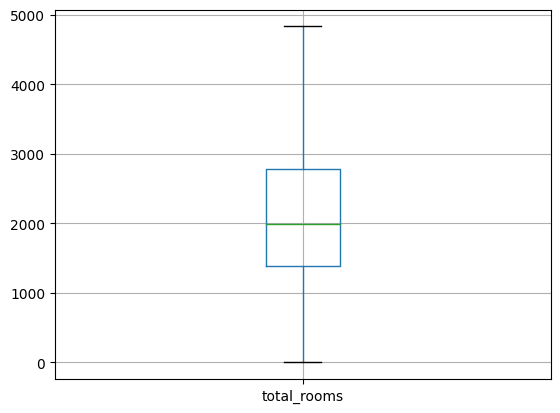

In [146]:
df_filled.boxplot('total_rooms')

### Models

In [147]:
x=df_filled.drop(["median_house_value"],axis=1)
y=df_filled["median_house_value"]

In [148]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY
...,...,...,...,...,...,...,...,...,...
18533,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
18534,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
18535,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
18536,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [149]:
y

0        452600.0
1        352100.0
2        341300.0
3        342200.0
4        269700.0
           ...   
18533     78100.0
18534     77100.0
18535     92300.0
18536     84700.0
18537     89400.0
Name: median_house_value, Length: 18538, dtype: float64

In [150]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
np.set_printoptions(suppress=True)

In [151]:
print(x)

[[   0.        0.        0.     ...  322.      126.        8.3252]
 [   0.        0.        0.     ...  496.      177.        7.2574]
 [   0.        0.        0.     ...  558.      219.        5.6431]
 ...
 [   0.        1.        0.     ... 1007.      433.        1.7   ]
 [   0.        1.        0.     ...  741.      349.        1.8672]
 [   0.        1.        0.     ... 1387.      530.        2.3886]]


In [152]:

#FeatureSelection = SelectPercentile( percentile=20) 
#x= FeatureSelection.fit_transform(x, y)
#print (x)


In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train : \n',x_train)
print('\n y_train : \n',y_train)
print("\n x_test shape: \n",x_test)
print("\n y_test: \n ",y_test)


x_train : 
 [[   1.        0.        0.     ... 1461.      475.       10.3979]
 [   0.        0.        0.     ... 2535.      783.        2.3669]
 [   1.        0.        0.     ... 1514.      549.        8.8612]
 ...
 [   1.        0.        0.     ...  762.      344.        2.2222]
 [   0.        1.        0.     ...   93.       27.       10.9891]
 [   0.        1.        0.     ...  620.      207.        1.9417]]

 y_train : 
 16237    500001.0
18194    165300.0
3249     500001.0
13003    295300.0
6894      96500.0
           ...   
9225     109500.0
13123    158900.0
9845     276800.0
10799    312500.0
2732      53800.0
Name: median_house_value, Length: 14830, dtype: float64

 x_test shape: 
 [[   0.        1.        0.     ...  884.      395.        2.1679]
 [   1.        0.        0.     ...  771.      240.        5.3836]
 [   1.        0.        0.     ... 1641.      436.        2.2326]
 ...
 [   0.        0.        0.     ...  602.      183.        3.7885]
 [   0.        1.    

In [154]:
scaler = StandardScaler()
## fit and transform to training data (only Numerical)
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [155]:
x_train = pd.DataFrame(x_train)
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,-122.02,37.29,25.0,3845.0,492.0,1461.0,475.0,10.3979
1,0.0,0.0,0.0,0.0,1.0,-119.30,34.29,50.0,3128.0,825.0,2535.0,783.0,2.3669
2,1.0,0.0,0.0,0.0,0.0,-118.51,34.25,24.0,4338.0,558.0,1514.0,549.0,8.8612
3,0.0,0.0,0.0,0.0,1.0,-117.20,32.85,22.0,3501.0,631.0,1297.0,581.0,4.7891
4,1.0,0.0,0.0,0.0,0.0,-118.25,33.92,46.0,723.0,154.0,411.0,165.0,2.0893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14825,0.0,1.0,0.0,0.0,0.0,-120.20,39.33,26.0,1988.0,379.0,905.0,321.0,3.7841
14826,0.0,0.0,0.0,0.0,1.0,-117.18,32.76,8.0,3694.0,997.0,1297.0,807.0,3.6492
14827,1.0,0.0,0.0,0.0,0.0,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222
14828,0.0,1.0,0.0,0.0,0.0,-121.00,39.00,4.0,170.0,23.0,93.0,27.0,10.9891


In [156]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [157]:
y_pred_l = regressor.predict(x_test)

In [158]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [159]:
MSEValue_l = mean_absolute_error(y_test, y_pred_l, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value using LinearRegression is : ', MSEValue_l)

mean_absolute_error Value using LinearRegression is :  49769.385939228945


In [160]:
MSEValue_l = mean_absolute_error(y_test, y_pred_l, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value using LinearRegression is : ', MSEValue_l)

mean_absolute_error Value using LinearRegression is :  49769.385939228945


In [161]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)

In [162]:
RandomForestRegressorModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=33)

In [163]:
y_pred_r=RandomForestRegressorModel.predict(x_test)

In [164]:
MSEValue_r = mean_absolute_error(y_test, y_pred_r, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value using RandomForest is : ', MSEValue_r)

Mean Squared Error Value using RandomForest is :  60078.68931938676


In [165]:
#Applying DecisionTreeRegressor Model 
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [166]:
y_pred_d = dt.predict(x_test)

In [167]:
MSEValue_d = mean_absolute_error(y_test, y_pred_d, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value usingDecisionTree  is : ', MSEValue_d)

mean_absolute_error Value usingDecisionTree  is :  42899.42098166127


In [168]:
print('mean_absolute_error Value using LinearRegression is : ', MSEValue_l)
print('mean_absolute_error Value using RandomForest is : ', MSEValue_r)
print('mean_absolute_error Value usingDecisionTree  is : ', MSEValue_d)

mean_absolute_error Value using LinearRegression is :  49769.385939228945
mean_absolute_error Value using RandomForest is :  60078.68931938676
mean_absolute_error Value usingDecisionTree  is :  42899.42098166127


In [169]:
from sklearn.neighbors import KNeighborsRegressor

In [170]:

KNeighborsRegressorModel = KNeighborsRegressor()

In [171]:
KNeighborsRegressorModel.fit(x_train,y_train)

KNeighborsRegressor()

In [172]:
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(x_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(x_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred_n = KNeighborsRegressorModel.predict(x_test)

KNeighborsRegressorModel Train Score is :  0.49912244085528923
KNeighborsRegressorModel Test Score is :  0.26750990785681383
----------------------------------------------------


In [173]:
MSEValue_n = mean_absolute_error(y_test, y_pred_n, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value usingDecisionTree  is : ', MSEValue_n)

mean_absolute_error Value usingDecisionTree  is :  75620.08635382957


In [174]:
print('mean_absolute_error Value using LinearRegression is : ', MSEValue_l)
print('mean_absolute_error Value using RandomForest is : ', MSEValue_r)
print('mean_absolute_error Value usingDecisionTree  is : ', MSEValue_d)
print('mean_absolute_error Value usingDecisionTree  is : ', MSEValue_n)

mean_absolute_error Value using LinearRegression is :  49769.385939228945
mean_absolute_error Value using RandomForest is :  60078.68931938676
mean_absolute_error Value usingDecisionTree  is :  42899.42098166127
mean_absolute_error Value usingDecisionTree  is :  75620.08635382957


# drop weak correlation features

In [175]:
x_final=df_filled.drop(["median_house_value","housing_median_age","households","total_bedrooms"],axis=1)
x_final

,longitude,latitude,total_rooms,population,median_income,ocean_proximity
0,-122.23,37.88,880.0,322.0,8.3252,NEAR BAY
1,-122.24,37.85,1467.0,496.0,7.2574,NEAR BAY
2,-122.25,37.85,1274.0,558.0,5.6431,NEAR BAY
3,-122.25,37.85,1627.0,565.0,3.8462,NEAR BAY
4,-122.25,37.85,919.0,413.0,4.0368,NEAR BAY
...,...,...,...,...,...,...
18533,-121.09,39.48,1665.0,845.0,1.5603,INLAND
18534,-121.21,39.49,697.0,356.0,2.5568,INLAND
18535,-121.22,39.43,2254.0,1007.0,1.7000,INLAND
18536,-121.32,39.43,1860.0,741.0,1.8672,INLAND


In [176]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
x_final = np.array(ct.fit_transform(x_final))
np.set_printoptions(suppress=True)


In [177]:
print(x_final)

[[   0.        0.        0.     ...  880.      322.        8.3252]
 [   0.        0.        0.     ... 1467.      496.        7.2574]
 [   0.        0.        0.     ... 1274.      558.        5.6431]
 ...
 [   0.        1.        0.     ... 2254.     1007.        1.7   ]
 [   0.        1.        0.     ... 1860.      741.        1.8672]
 [   0.        1.        0.     ... 2785.     1387.        2.3886]]


In [178]:
x_final_train,x_final_test,y_train,y_test = train_test_split(x_final,y,test_size=0.2,random_state=0)
print('x_final_train : \n',x_final_train)
print('\n y_train : \n',y_train)
print("\n x_final_test shape: \n",x_final_test)
print("\n y_test: \n ",y_test)

x_final_train : 
 [[   1.        0.        0.     ... 3845.     1461.       10.3979]
 [   0.        0.        0.     ... 3128.     2535.        2.3669]
 [   1.        0.        0.     ... 4338.     1514.        8.8612]
 ...
 [   1.        0.        0.     ... 1328.      762.        2.2222]
 [   0.        1.        0.     ...  170.       93.       10.9891]
 [   0.        1.        0.     ...  991.      620.        1.9417]]

 y_train : 
 16237    500001.0
18194    165300.0
3249     500001.0
13003    295300.0
6894      96500.0
           ...   
9225     109500.0
13123    158900.0
9845     276800.0
10799    312500.0
2732      53800.0
Name: median_house_value, Length: 14830, dtype: float64

 x_final_test shape: 
 [[   0.        1.        0.     ... 1893.      884.        2.1679]
 [   1.        0.        0.     ... 1582.      771.        5.3836]
 [   1.        0.        0.     ... 2076.     1641.        2.2326]
 ...
 [   0.        0.        0.     ...  726.      602.        3.7885]
 [   0.  

In [179]:
scaler = StandardScaler()
## fit and transform to training data (only Numerical)
x_final_train_scaled = scaler.fit_transform(x_final_train)

x_final_test_scaled = scaler.transform(x_final_test)

In [180]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_final_train, y_train)

LinearRegression()

In [181]:
y_pred_l = regressor.predict(x_final_test)


In [182]:
from sklearn.metrics import mean_squared_error 

In [183]:
MSEValue_l = mean_absolute_error(y_test, y_pred_l, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value using LinearRegression is : ', MSEValue_l)

mean_absolute_error Value using LinearRegression is :  53109.675822405545


In [184]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)

In [185]:
RandomForestRegressorModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=33)

In [186]:
y_pred_r = dt.predict(x_test)

In [187]:
MSEValue_r = mean_absolute_error(y_test, y_pred_r, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value using RandomForest is : ', MSEValue_r)

mean_absolute_error Value using RandomForest is :  42899.42098166127


In [188]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

1.0

In [189]:
y_pred_d = dt.predict(x_test)

In [190]:
MSEValue_d = mean_absolute_error(y_test, y_pred_d, multioutput='uniform_average') # it can be raw_values
print('mean_absolute_error Value  using DecisionTree is : ', MSEValue_d)

mean_absolute_error Value  using DecisionTree is :  42852.764293419634


In [191]:
print('mean_absolute_error Value using LinearRegression is : ', MSEValue_l)
print('mean_absolute_error Value using RandomForest is : ', MSEValue_r)
print('mean_absolute_error Value  using DecisionTree is : ', MSEValue_d)

mean_absolute_error Value using LinearRegression is :  53109.675822405545
mean_absolute_error Value using RandomForest is :  42899.42098166127
mean_absolute_error Value  using DecisionTree is :  42852.764293419634
